# Simple MLP with no hidden layer and 10 output neurons with softmax

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import sys
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

In [2]:
#you could also get data from the web, this way
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

dir="MNIST_data/"
# Import data
mnist = input_data.read_data_sets(dir, one_hot=True)
mnist.train.images.shape
mnist.train.labels.shape
mnist.test.images.shape
mnist.test.labels.shape

W0825 16:05:45.252945  5024 deprecation.py:323] From <ipython-input-2-f5c407a462e3>:7: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0825 16:05:45.259932  5024 deprecation.py:323] From C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0825 16:05:45.260922  5024 deprecation.py:323] From C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructi

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0825 16:05:45.466967  5024 deprecation.py:323] From C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0825 16:05:45.468929  5024 deprecation.py:323] From C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0825 16:05:45.510818  5024 deprecation.py:323] From C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated 

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


(55000, 784)

(55000, 10)

(10000, 784)

(10000, 10)

In [3]:
mnist.train.labels[0]
mnist.train.images[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

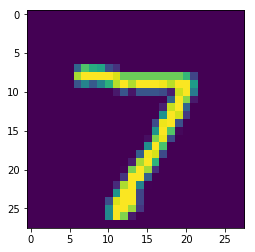

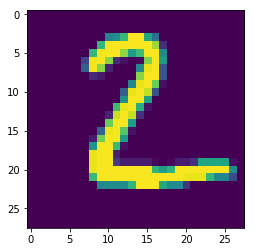

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
from matplotlib import pyplot as plt
import numpy as np
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d)
    return plt

#mnist.test.images[0]
gen_image(mnist.test.images[0]).show()
gen_image(mnist.test.images[1]).show()
print(mnist.test.labels[0], mnist.test.labels[1])

In [ ]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

In [ ]:
# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

W0823 23:41:28.935208 23728 deprecation.py:323] From <ipython-input-6-3ba2fc752236>:3: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
%%time
# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, {x: batch_xs, y_: batch_ys})

InternalError: Blas GEMM launch failed : a.shape=(100, 784), b.shape=(784, 10), m=100, n=10, k=784
	 [[node MatMul (defined at <ipython-input-5-04cb70eae560>:5) ]]

Errors may have originated from an input operation.
Input Source operations connected to node MatMul:
 Placeholder (defined at <ipython-input-5-04cb70eae560>:2)	
 Variable/read (defined at <ipython-input-5-04cb70eae560>:3)

Original stack trace for 'MatMul':
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\asyncio\base_events.py", line 427, in run_forever
    self._run_once()
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\asyncio\base_events.py", line 1440, in _run_once
    handle._run()
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\ipykernel\kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tornado\gen.py", line 346, in wrapper
    runner = Runner(result, future, yielded)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tornado\gen.py", line 1080, in __init__
    self.run()
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\IPython\core\interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\IPython\core\interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\IPython\core\interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\IPython\core\interactiveshell.py", line 3191, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-04cb70eae560>", line 5, in <module>
    y = tf.matmul(x, W) + b
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tensorflow\python\util\dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tensorflow\python\ops\math_ops.py", line 2647, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 5925, in mat_mul
    name=name)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\abhijit\Anaconda2\envs\py37\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
y.shape
y_.shape
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                  y_: mnist.test.labels}))
print(sess.run([W,b]))

TensorShape([Dimension(None), Dimension(10)])

TensorShape([Dimension(None), Dimension(10)])

In [ ]:
import sys
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import time
import math

dir="MNIST_data/"
NUM_CLASSES = 10
# The MNIST images are always 28x28 pixels.
IMAGE_SIZE = 28
IMAGE_PIXELS = IMAGE_SIZE * IMAGE_SIZE
batch_size=100
hidden1=128
hidden2=32
learning_rate=0.01
log_dir="logs/"
max_steps=5000

# MLP with multiple hidden layers

In [ ]:
#Generate placeholder variables to represent the input tensors.
def placeholder_inputs(batch_size):
  images_placeholder = tf.placeholder(tf.float32, shape=(batch_size, IMAGE_PIXELS))
  labels_placeholder = tf.placeholder(tf.int32, shape=(batch_size))
  return images_placeholder, labels_placeholder

In [ ]:
#Fills the feed_dict for training the given step with the next "batch size" examples
def fill_feed_dict(data_set, images_pl, labels_pl):
  images_feed, labels_feed = data_set.next_batch(batch_size)
  feed_dict = {
      images_pl: images_feed,
      labels_pl: labels_feed,
  }
  return feed_dict

In [ ]:
#Runs one evaluation against the full epoch of data.
def do_eval(sess,eval_correct,images_placeholder,labels_placeholder,data_set):
  true_count = 0  # Counts the number of correct predictions.
  steps_per_epoch = data_set.num_examples // batch_size
  num_examples = steps_per_epoch * batch_size
  for step in range(steps_per_epoch):
    feed_dict = fill_feed_dict(data_set,images_placeholder,labels_placeholder)
    true_count += sess.run(eval_correct, feed_dict=feed_dict)
  precision = float(true_count) / num_examples
  print('  Num examples: %d  Num correct: %d  Precision @ 1: %0.04f' %
        (num_examples, true_count, precision))

In [ ]:
#Build the MNIST model
def inference(images, hidden1_units, hidden2_units):
  # Hidden 1
  with tf.name_scope('hidden1'):
    weights = tf.Variable(tf.truncated_normal([IMAGE_PIXELS, hidden1_units],
                            stddev=1.0 / math.sqrt(float(IMAGE_PIXELS))), name='weights')
    biases = tf.Variable(tf.zeros([hidden1_units]), name='biases')
    hidden1 = tf.nn.relu(tf.matmul(images, weights) + biases)
  # Hidden 2
  with tf.name_scope('hidden2'):
    weights = tf.Variable(tf.truncated_normal([hidden1_units, hidden2_units],
                            stddev=1.0 / math.sqrt(float(hidden1_units))), name='weights')
    biases = tf.Variable(tf.zeros([hidden2_units]), name='biases')
    hidden2 = tf.nn.relu(tf.matmul(hidden1, weights) + biases)
  # Linear
  with tf.name_scope('softmax_linear'):
    weights = tf.Variable(tf.truncated_normal([hidden2_units, NUM_CLASSES],
                            stddev=1.0 / math.sqrt(float(hidden2_units))), name='weights')
    biases = tf.Variable(tf.zeros([NUM_CLASSES]), name='biases')
    logits = tf.matmul(hidden2, weights) + biases
  return logits

In [ ]:
#Calculates the loss from the logits and the labels.
def lossFn(logits, labels):
  labels = tf.to_int64(labels)
  cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits, name='xentropy')
  return tf.reduce_mean(cross_entropy, name='xentropy_mean')

In [ ]:
def training(loss, learning_rate):
  # Add a scalar summary for the snapshot loss.
  tf.summary.scalar('loss', loss)
  optimizer = tf.train.GradientDescentOptimizer(learning_rate)
  # Create a variable to track the global step.
  global_step = tf.Variable(0, name='global_step', trainable=False)
  train_op = optimizer.minimize(loss, global_step=global_step)
  return train_op

In [ ]:
#Evaluate the quality of the logits at predicting the label.
def evaluation(logits, labels):
  # For a classifier model, we can use the in_top_k Op.
  # It returns a bool tensor with shape [batch_size] that is true for
  # the examples where the label is in the top k (here k=1)
  # of all logits for that example.
  correct = tf.nn.in_top_k(logits, labels, 1)
  # Return the number of true entries.
  return tf.reduce_sum(tf.cast(correct, tf.int32))

In [5]:
data_sets = input_data.read_data_sets(dir)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
#Train MNIST for a number of steps
def run_training():
  # Get the sets of images and labels for training, validation, and
  # test on MNIST.
  data_sets = input_data.read_data_sets(dir)
  with tf.Graph().as_default():
    images_placeholder, labels_placeholder = placeholder_inputs(batch_size)
    # Build a Graph that computes predictions from the inference model.
    logits = inference(images_placeholder, hidden1, hidden2)
    loss = lossFn(logits, labels_placeholder)
    train_op = training(loss, learning_rate)
    eval_correct = evaluation(logits, labels_placeholder)
    
    summary = tf.summary.merge_all()
    saver = tf.train.Saver()


    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)
    summary_writer = tf.summary.FileWriter(log_dir, sess.graph)
    
    for step in range(max_steps):
      start_time = time.time()
      feed_dict = fill_feed_dict(data_sets.train, images_placeholder, labels_placeholder)
      #The return values are the activations
      # from the `train_op` (which is discarded) and the `loss` Op.  To
      # inspect the values of your Ops or variables, you may include them
      # in the list passed to sess.run() and the value tensors will be
      # returned in the tuple from the call.
      _, loss_value = sess.run([train_op, loss],feed_dict=feed_dict)
      duration = time.time() - start_time

      # Write the summaries and print an overview fairly often.
      if step % 100 == 0:
        print('Step %d: loss = %.2f (%.3f sec)' % (step, loss_value, duration))
        summary_str = sess.run(summary, feed_dict=feed_dict)
        summary_writer.add_summary(summary_str, step)
        summary_writer.flush()

      # Save a checkpoint and evaluate the model periodically.
      if (step + 1) % 1000 == 0 or (step + 1) == max_steps:
        checkpoint_file = os.path.join(log_dir, 'model.ckpt')
        saver.save(sess, checkpoint_file, global_step=step)
        # Evaluate against the training set.
        print('Training Data Eval:')
        do_eval(sess,eval_correct,images_placeholder,labels_placeholder,data_sets.train)
        # Evaluate against the validation set.
        print('Validation Data Eval:')
        do_eval(sess,eval_correct,images_placeholder,labels_placeholder,data_sets.validation)
        # Evaluate against the test set.
        print('Test Data Eval:')
        do_eval(sess,eval_correct,images_placeholder,labels_placeholder,data_sets.test)
    summary_writer.close()

In [ ]:
import shutil,os
#if os.path.exists(log_dir):
#    shutil.rmtree(log_dir)
tf.gfile.MakeDirs(log_dir)
run_training()

In [ ]:
#Count total number of parameters
total_parameters = 0
for variable in tf.trainable_variables():
    # shape is an array of tf.Dimension
    shape = variable.get_shape()
    print(variable.name, shape)
    print(len(shape))
    variable_parameters = 1
    for dim in shape:
        print(dim)
        variable_parameters *= dim.value
    print(variable_parameters)
    total_parameters += variable_parameters
print(total_parameters)